# Unit 3.  Non-Parametric classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sbn
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import tree

from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_learning_curves

In [2]:
# Read the database
db = pd.read_csv('pima_indian_diabetes.csv')

In [3]:
db['Glucose'] = db['Glucose'].replace(0, np.nan)
db['BloodPressure'] = db['BloodPressure'].replace(0, np.nan)
db['SkinThickness'] = db['SkinThickness'].replace(0, np.nan)
db['Insulin'] = db['Insulin'].replace(0, np.nan)
db['BMI'] = db['BMI'].replace(0, np.nan)
db = db.fillna(np.mean(db))

In [4]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Create X and Y
X = db.drop(['Outcome'], axis = 1)
Y = db['Outcome']
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


In [6]:
# Separate in train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [7]:
# Normalize data
X_norm = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
print(X_train_norm.shape)
print(X_test_norm.shape)

(537, 8)
(231, 8)


In [16]:
# k-NN withouth cross-validation --> INCORRECT

In [17]:
# Design KNN model, for example wih k = 3
knn = KNeighborsClassifier(n_neighbors = 3)

# train the model
knn.fit(X_train, Y_train)

## Predict using X_test
y_pred = knn.predict(X_test)

print('Accuracy: ', knn.score(X_test, Y_test))

Accuracy:  0.7359307359307359


In [18]:
k_values = range(1,31,2)

In [19]:
print(k_values)

range(1, 31, 2)


Score [0.65363128 0.69832402 0.67039106]
Score [0.67039106 0.69832402 0.67039106]
Score [0.65921788 0.74860335 0.69832402]
Score [0.68715084 0.74860335 0.70391061]
Score [0.70391061 0.73184358 0.72625698]
Score [0.70391061 0.74860335 0.73184358]
Score [0.69832402 0.74301676 0.72067039]
Score [0.69832402 0.75977654 0.70391061]
Score [0.70391061 0.77653631 0.70391061]
Score [0.70949721 0.77653631 0.72067039]
Score [0.69273743 0.77094972 0.72067039]
Score [0.69273743 0.77653631 0.72625698]
Score [0.70391061 0.76536313 0.70949721]
Score [0.70949721 0.75977654 0.67039106]
Score [0.72067039 0.76536313 0.69273743]


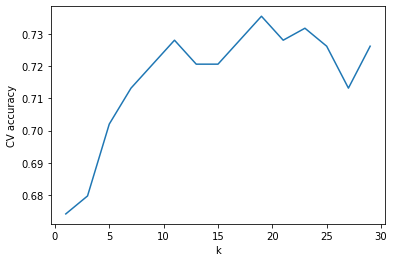

19


In [20]:
cv_k_scores=[]
for k in k_values:
    kNN=KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(kNN, X_train, Y_train, cv=3, scoring='accuracy')
    print('Score',scores)
    cv_k_scores.append(scores.mean())
    
plt.plot(k_values, cv_k_scores)
plt.xlabel('k')
plt.ylabel('CV accuracy')
plt.show()

# Select the maximum because we are considering accuracuy
print(np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

In [21]:
kNN=KNeighborsClassifier(n_neighbors=np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])
model=kNN.fit(X_train,Y_train) 

In [22]:
y_pred=model.predict(X_test)

In [23]:
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

0.7662337662337663
[[132  23]
 [ 31  45]]


In [24]:
# GridSearchCV
param_grid = {'n_neighbors': k_values}
# k-NN
kNN_model=KNeighborsClassifier()
#use gridsearch to test all values
grid = GridSearchCV(kNN_model, param_grid, cv = 3, scoring = 'accuracy')
grid.fit(X_train,Y_train)
print(grid.best_params_)


{'n_neighbors': 19}


In [25]:
my_model = grid.best_estimator_
my_model.fit(X_train, Y_train)
y_predicted = my_model.predict(X_test)
print(accuracy_score(Y_test, y_predicted))
print(confusion_matrix(Y_test, y_predicted))

0.7662337662337663
[[132  23]
 [ 31  45]]


C:\Users\palac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=n_neighbors, param_range=range(1, 31, 2) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


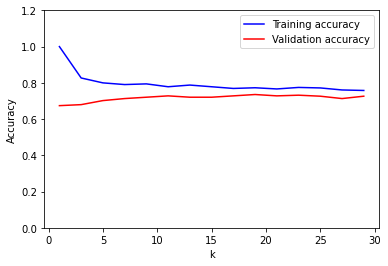

In [26]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import validation_curve, GridSearchCV
train_score, val_score = validation_curve(KNeighborsClassifier(), X_train, Y_train,
                                          'n_neighbors', k_values, cv=3)

plt.plot(k_values, np.mean(train_score, 1), color='blue', label='Training accuracy')
plt.plot(k_values, np.mean(val_score, 1), color='red', label='Validation accuracy')
plt.legend(loc='best')
plt.ylim(0, 1.2)
plt.xlabel('k')
plt.ylabel('Accuracy');

## Decision Trees

Design a decision tree based classifier using the training and test subsets described above.

Include the confusion matrix as well as the results obtained based on two evaluation measures considered.


In [27]:
# Free parameters
max_depth = np.arange(3, 15)
min_samples_leaf = [50, 100, 200]

In [28]:
# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}

# decision tree model
dtree_model=tree.DecisionTreeClassifier()

#use gridsearch to test all values
dtree_model = GridSearchCV(dtree_model, param_grid, cv=5)

#fit model to data
dtree_model=dtree_model.fit(X_train, Y_train)
print(dtree_model.best_params_)

{'criterion': 'gini', 'max_depth': 3}


In [29]:
# Train de model
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train, Y_train)

#Predict using X_test
y_predicted = my_model.predict(X_test)

# Results
print(accuracy_score(Y_test, y_predicted))
print(confusion_matrix(Y_test, y_predicted))


0.7532467532467533
[[130  25]
 [ 32  44]]


In [30]:
my_tree.get_depth()

3

In [31]:
my_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

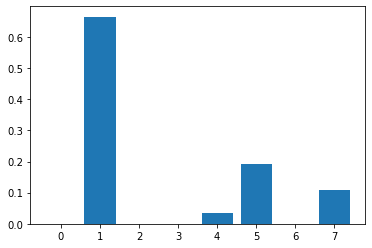

In [32]:
from matplotlib import pyplot
importance=my_tree.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [33]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

C:\Users\palac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=max_depth, param_range=[ 3  4  5  6  7  8  9 10 11 12 13 14] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


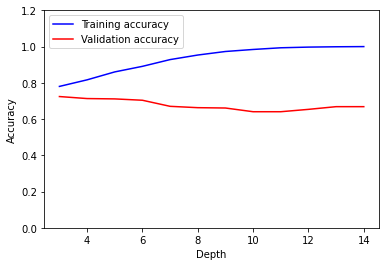

In [34]:
from sklearn.model_selection import learning_curve, GridSearchCV
#from sklearn.learning_curve import validation_curve
from sklearn.model_selection import validation_curve, GridSearchCV
train_score, val_score = validation_curve(tree.DecisionTreeClassifier(), X_train, Y_train,
                                          'max_depth', max_depth, cv=3)

plt.plot(max_depth, np.mean(train_score, 1), color='blue', label='Training accuracy')
plt.plot(max_depth, np.mean(val_score, 1), color='red', label='Validation accuracy')
plt.legend(loc='best')
plt.ylim(0, 1.2)
plt.xlabel('Depth')
plt.ylabel('Accuracy');

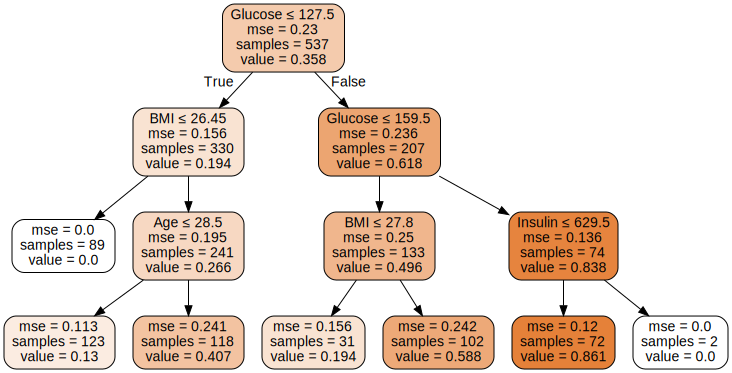

In [35]:
import graphviz 
from sklearn.tree import export_graphviz, DecisionTreeRegressor

clf = DecisionTreeRegressor(max_depth=3, random_state=0)
clf.fit(X_train, Y_train)

# plot
dot_data = export_graphviz(clf,
                           feature_names=db.columns[0:-1],
                           out_file=None,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           class_names=['Diabetic','Non Diabetic'])
graph = graphviz.Source(dot_data)
graph

# ASSIGNMENTS LAB 3

## K-NN



Justify the type of normalization considered and explain how it is done on each subset (training, validation and test). Indicate if the performance obtained in the test set changes after normalizing the variables.

Reasonably explain the relationship between the capacity of generalization and the value of k. Include the obtained curves for an evaluation measure considered both for the train set and for the validation set as a function of the k parameter. Briefly comment on them.

#### Normalized 

In [36]:
# Normalize data
X_norm = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [37]:
k_values = range(1,31,2)

Score [0.66480447 0.65921788 0.68715084]
Score [0.69832402 0.7150838  0.72625698]
Score [0.70391061 0.74860335 0.77653631]
Score [0.70949721 0.77653631 0.77094972]
Score [0.72625698 0.78212291 0.76536313]
Score [0.72625698 0.78212291 0.78212291]
Score [0.73184358 0.79329609 0.79888268]
Score [0.70391061 0.78212291 0.7877095 ]
Score [0.68156425 0.78212291 0.80446927]
Score [0.69273743 0.77653631 0.7877095 ]
Score [0.7150838  0.77094972 0.77653631]
Score [0.70949721 0.77653631 0.78212291]
Score [0.72067039 0.7877095  0.77653631]
Score [0.72625698 0.79888268 0.77094972]
Score [0.72625698 0.77653631 0.78212291]


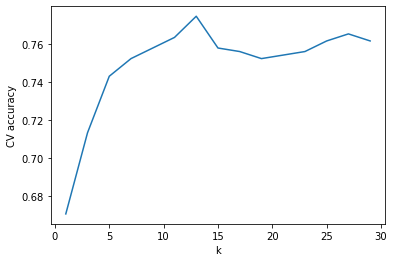

13


In [38]:
cv_k_scores=[]
for k in k_values:
    kNN=KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(kNN, X_train_norm, Y_train, cv=3, scoring='accuracy')
    print('Score',scores)
    cv_k_scores.append(scores.mean())
    
plt.plot(k_values, cv_k_scores)
plt.xlabel('k')
plt.ylabel('CV accuracy')
plt.show()

# Select the maximum because we are considering accuracuy
print(np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

In [39]:
kNN=KNeighborsClassifier(n_neighbors=np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])
model=kNN.fit(X_train_norm,Y_train) 

In [40]:
y_pred=model.predict(X_test_norm)

In [41]:
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

0.7316017316017316
[[133  22]
 [ 40  36]]


C:\Users\palac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=n_neighbors, param_range=range(1, 31, 2) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


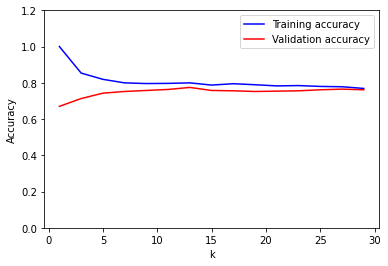

In [42]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import validation_curve, GridSearchCV
train_score, val_score = validation_curve(KNeighborsClassifier(), X_train_norm, Y_train,
                                          'n_neighbors', k_values, cv=3)

plt.plot(k_values, np.mean(train_score, 1), color='blue', label='Training accuracy')
plt.plot(k_values, np.mean(val_score, 1), color='red', label='Validation accuracy')
plt.legend(loc='best')
plt.ylim(0, 1.2)
plt.xlabel('k')
plt.ylabel('Accuracy');

#### Not normalized

Score [0.65363128 0.69832402 0.67039106]
Score [0.67039106 0.69832402 0.67039106]
Score [0.65921788 0.74860335 0.69832402]
Score [0.68715084 0.74860335 0.70391061]
Score [0.70391061 0.73184358 0.72625698]
Score [0.70391061 0.74860335 0.73184358]
Score [0.69832402 0.74301676 0.72067039]
Score [0.69832402 0.75977654 0.70391061]
Score [0.70391061 0.77653631 0.70391061]
Score [0.70949721 0.77653631 0.72067039]
Score [0.69273743 0.77094972 0.72067039]
Score [0.69273743 0.77653631 0.72625698]
Score [0.70391061 0.76536313 0.70949721]
Score [0.70949721 0.75977654 0.67039106]
Score [0.72067039 0.76536313 0.69273743]


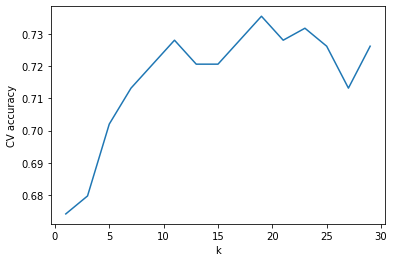

19


In [43]:
cv_k_scores=[]
for k in k_values:
    kNN=KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(kNN, X_train, Y_train, cv=3, scoring='accuracy')
    print('Score',scores)
    cv_k_scores.append(scores.mean())
    
plt.plot(k_values, cv_k_scores)
plt.xlabel('k')
plt.ylabel('CV accuracy')
plt.show()

# Select the maximum because we are considering accuracuy
print(np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

In [44]:
kNN=KNeighborsClassifier(n_neighbors=np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])
model=kNN.fit(X_train,Y_train) 

In [45]:
y_pred=model.predict(X_test)

In [46]:
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

0.7662337662337663
[[132  23]
 [ 31  45]]


C:\Users\palac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=n_neighbors, param_range=range(1, 31, 2) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


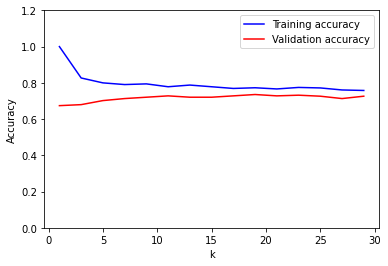

In [47]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import validation_curve, GridSearchCV
train_score, val_score = validation_curve(KNeighborsClassifier(), X_train, Y_train,
                                          'n_neighbors', k_values, cv=3)

plt.plot(k_values, np.mean(train_score, 1), color='blue', label='Training accuracy')
plt.plot(k_values, np.mean(val_score, 1), color='red', label='Validation accuracy')
plt.legend(loc='best')
plt.ylim(0, 1.2)
plt.xlabel('k')
plt.ylabel('Accuracy');

## Decision Trees

Indicate if the performance obtained in the test set changes after normalizing the variables.

In terms of under- and over-fitting, explain which is more likely to occur if the maximum number of cases per tree node is very small.

Indicate which of the parameters explained in theory you have analyzed to achieve that the designed model has generalization capacity. Include the obtained curves for an evaluation measure considered both for the train set and for the validation set as a function of the selected parameter. Comment them briefly.

#### Normalized

In [48]:
# Normalize data
X_norm = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [49]:
# Free parameters
max_depth = np.arange(3, 15)
min_samples_leaf = [50, 100, 200]

In [50]:
# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}

# decision tree model
dtree_model=tree.DecisionTreeClassifier()

#use gridsearch to test all values
dtree_model = GridSearchCV(dtree_model, param_grid, cv=5)

#fit model to data
dtree_model=dtree_model.fit(X_train_norm, Y_train)
print(dtree_model.best_params_)

{'criterion': 'gini', 'max_depth': 3}


In [51]:
# Train de model
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train_norm, Y_train)

#Predict using X_test
y_predicted = my_model.predict(X_test_norm)

# Results
print(accuracy_score(Y_test, y_predicted))
print(confusion_matrix(Y_test, y_predicted))

0.7532467532467533
[[130  25]
 [ 32  44]]


C:\Users\palac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=max_depth, param_range=[ 3  4  5  6  7  8  9 10 11 12 13 14] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


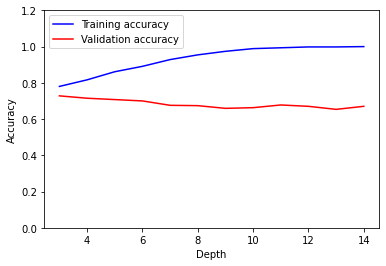

In [52]:
from sklearn.model_selection import learning_curve, GridSearchCV
#from sklearn.learning_curve import validation_curve
from sklearn.model_selection import validation_curve, GridSearchCV
train_score, val_score = validation_curve(tree.DecisionTreeClassifier(), X_train_norm, Y_train,
                                          'max_depth', max_depth, cv=3)

plt.plot(max_depth, np.mean(train_score, 1), color='blue', label='Training accuracy')
plt.plot(max_depth, np.mean(val_score, 1), color='red', label='Validation accuracy')
plt.legend(loc='best')
plt.ylim(0, 1.2)
plt.xlabel('Depth')
plt.ylabel('Accuracy');

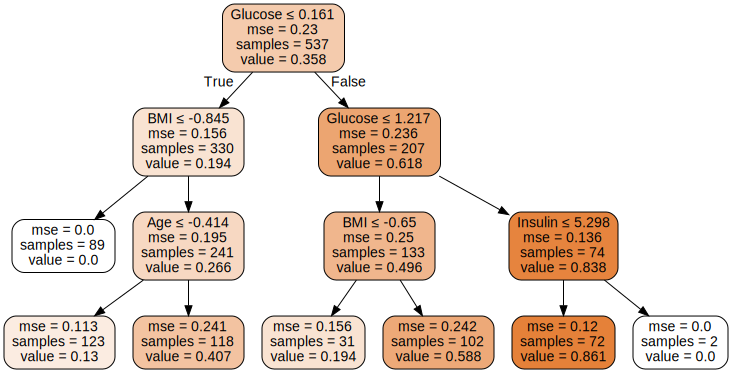

In [53]:
import graphviz 
from sklearn.tree import export_graphviz, DecisionTreeRegressor

clf = DecisionTreeRegressor(max_depth=3, random_state=0)
clf.fit(X_train_norm, Y_train)

# plot
dot_data = export_graphviz(clf,
                           feature_names=db.columns[0:-1],
                           out_file=None,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           class_names=['Diabetic','Non Diabetic'])
graph = graphviz.Source(dot_data)
graph

#### Not normalized

In [54]:
# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}

# decision tree model
dtree_model=tree.DecisionTreeClassifier()

#use gridsearch to test all values
dtree_model = GridSearchCV(dtree_model, param_grid, cv=5)

#fit model to data
dtree_model=dtree_model.fit(X_train, Y_train)
print(dtree_model.best_params_)

{'criterion': 'gini', 'max_depth': 3}


In [55]:
# Train de model
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train, Y_train)

#Predict using X_test
y_predicted = my_model.predict(X_test)

# Results
print(accuracy_score(Y_test, y_predicted))
print(confusion_matrix(Y_test, y_predicted))

0.7532467532467533
[[130  25]
 [ 32  44]]


C:\Users\palac\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=max_depth, param_range=[ 3  4  5  6  7  8  9 10 11 12 13 14] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


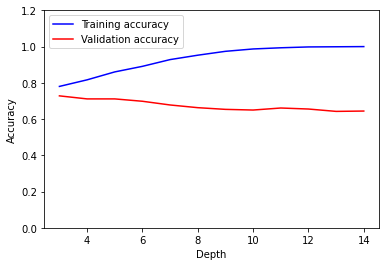

In [56]:
from sklearn.model_selection import learning_curve, GridSearchCV
#from sklearn.learning_curve import validation_curve
from sklearn.model_selection import validation_curve, GridSearchCV
train_score, val_score = validation_curve(tree.DecisionTreeClassifier(), X_train, Y_train,
                                          'max_depth', max_depth, cv=3)

plt.plot(max_depth, np.mean(train_score, 1), color='blue', label='Training accuracy')
plt.plot(max_depth, np.mean(val_score, 1), color='red', label='Validation accuracy')
plt.legend(loc='best')
plt.ylim(0, 1.2)
plt.xlabel('Depth')
plt.ylabel('Accuracy');

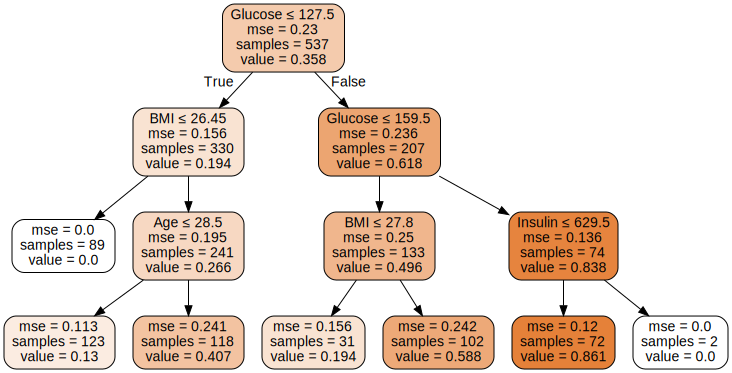

In [57]:
import graphviz 
from sklearn.tree import export_graphviz, DecisionTreeRegressor

clf = DecisionTreeRegressor(max_depth=3, random_state=0)
clf.fit(X_train, Y_train)

# plot
dot_data = export_graphviz(clf,
                           feature_names=db.columns[0:-1],
                           out_file=None,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           class_names=['Diabetic','Non Diabetic'])
graph = graphviz.Source(dot_data)
graph

## Multilayer perceptron

Designed a Multilayer Perceptron (MLP) with a single hidden layer, random initialization of the neural network weights and  back- propagation training algorithm. Reasonably justify:

a) The number of neurons in the input layer.
- 8 layers, each one corresponding to the parameters of the X vector

b) The number of neurons in the output layer.
- 2, being the binary outcomes as "Diabetic (1)" or "Non diabetic (0)"

c) The activation functions considered.
- In this case we chose "relu" function, as it is the default the activation function, which we kept due to its perfermance in our case

d) The value of the learning rate used.
- We chose an adaptative learning rate, this means it will start from 0.001 ("learning_rate_init" mediated) and it will increase or decrease depending on the perfomance evaluated by the backpropagation

e) The cost function to be optimized.
- MLP minimizes the Cross-Entropy loss function, giving a vector of probability estimates per sample : 'p(y/x) per sample x'


Explain briefly and concise way what an epoch is, exemplifying with your particular case.

Reasonably justify the choice of a architecture that provides good performance in the test set.

Some useful links:

    https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
    
    https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [8]:
from sklearn.neural_network import MLPClassifier

X = db.drop(['Outcome'], axis = 1)
Y = db['Outcome']

# Separate in train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

##### Hyperparameters of the network:

- **alpha parameter** regularizes the biggest weights with a penalization to avoid overfitting

- **activation function** chosen is relu function, the most common one in this kind of exercises.

- **max_iter** parameter determines number of epochs

- default **solver** is 'adam' but for small datasets 'lbfgs' performs better

- **hidden_layer_sizes** (x,y) sets y number of layers with x number of neurons per layer

- **learning rate** in our case is adaptative, step will be increased or decreased depending of performance, it has an initial point of 0.001



MLP trains using Backpropagation. More precisely, it trains using an stochastic gradient descent and this gradient are calculated using Backpropagation.This means that each training epoch will receive error information from the previous one, allowing the network to improve the performance with each epoch

For classification, MLP minimizes the Cross-Entropy loss function, 
giving a vector of probability estimates  per sample : 'p(y/x) per sample x'

Once we've taken into account that previous information we could set our classifier:

In [46]:
hiddenlayer_values = range(1,10)

Score [0.6424581 0.6424581 0.6424581]


C:\Users\palac\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\palac\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\palac\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Score [0.74301676 0.72625698 0.70949721]
Score [0.73184358 0.75418994 0.77653631]
Score [0.72067039 0.75977654 0.79329609]


C:\Users\palac\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Score [0.74860335 0.77094972 0.75418994]


C:\Users\palac\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Score [0.70391061 0.75977654 0.74301676]


C:\Users\palac\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\palac\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Score [0.70391061 0.77653631 0.76536313]


C:\Users\palac\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Score [0.75418994 0.78212291 0.77094972]


C:\Users\palac\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\palac\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Score [0.73743017 0.73743017 0.77653631]


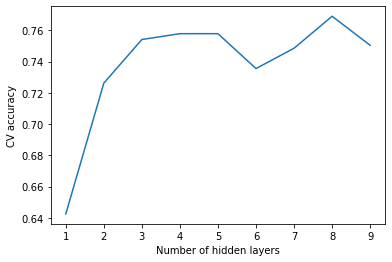

8


In [58]:
cv_hl_scores=[]
for k in hiddenlayer_values:
    clf = MLPClassifier(activation='relu',max_iter=800, solver='adam', alpha=0.001,hidden_layer_sizes=(6,k), random_state=1, learning_rate_init=0.001, learning_rate='adaptive')
    scores= cross_val_score(clf, X_train_norm, Y_train, cv=3, scoring='accuracy')
    print('Score',scores)
    cv_hl_scores.append(scores.mean())
    
plt.plot(hiddenlayer_values, cv_hl_scores)
plt.xlabel('Number of hidden layers')
plt.ylabel('CV accuracy')
plt.show()

# Select the maximum because we are considering accuracuy
print(np.array(hiddenlayer_values)[cv_hl_scores.index(np.array(cv_hl_scores).max())])

In [59]:
clf = MLPClassifier(activation='relu',max_iter=800, solver='adam', alpha=0.001,hidden_layer_sizes=(6,8), random_state=1, learning_rate_init=0.001, learning_rate='adaptive')

clf.get_params()

{'activation': 'relu',
 'alpha': 0.001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (6, 8),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 800,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [60]:
clf.fit(X_train_norm, Y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(6, 8), learning_rate='adaptive',
              max_iter=800, random_state=1)

In [61]:
Y_pred_MLP=clf.predict(X_test_norm)

In [62]:
print("Accuracy of the model:",accuracy_score(Y_test, Y_pred_MLP))
print(confusion_matrix(Y_test, Y_pred_MLP))

Accuracy of the model: 0.7748917748917749
[[132  23]
 [ 29  47]]


## Benchmark results


In view of the results obtained to solve the proposed classification task, briefly justify which model you consider most appropriate.